# Personal Information
Name: **Boris Wolfson**

StudentID: **13551884**

Email: [**boris.wolfson@student.uva.nl**](boris.wolfson@student.uva.nl)

Submitted on: **23.03.2024**

### Github
https://github.com/wolfbrr/ThesisDS

# Data Context
<!-- **In this section you should introduce the datasources and datasets which you will be working with. Explain where they are from as well as their domain. Give an overview of what the context of the data is. You should not spend more than 1 to 2 paragraphs here as the core information will be in the next section.**
From kaggle site:
There is a lack of public available datasets on financial services and specially in the emerging mobile money transactions domain. Financial datasets are important to many researchers and in particular to us performing research in the domain of fraud detection. Part of the problem is the intrinsically private nature of financial transactions, that leads to no publicly available datasets.

We present a synthetic dataset generated using the simulator called PaySim as an approach to such a problem. PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour to later evaluate the performance of fraud detection methods. -->

In the fraud detection domain, mostly due to the privacy of financial transaction restrictions, the available financial data are absent. A considerable amount of research was done on a simulated scenario available on Kaggle https://www.kaggle.com/datasets/ealaxi/paysim1. In this dataset, the fraudulent behavior of the agents aims to profit by taking control of customers' accounts and trying to empty the funds by transferring them to another account and then cashing out of the system. 


The data set is based on the work of 
E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016





# Data Description
<!-- 
**Present here the results of your exploratory data analysis. Note that there is no need to have a "story line" - it is more important that you show your understanding of the data and the methods that you will be using in your experiments (i.e. your methodology).**

**As an example, you could show data, label, or group balances, skewness, and basic characterizations of the data. Information about data frequency and distributions as well as results from reduction mechanisms such as PCA could be useful. Furthermore, indicate outliers and how/why you are taking them out of your samples, if you do so.**

**The idea is, that you conduct this analysis to a) understand the data better but b) also to verify the shapes of the distributions and whether they meet the assumptions of the methods that you will attempt to use. Finally, make good use of images, diagrams, and tables to showcase what information you have extracted from your data.**

As you can see, you are in a jupyter notebook environment here. This means that you should focus little on writing text and more on actually exploring your data. If you need to, you can use the amsmath environment in-line: $e=mc^2$ or also in separate equations such as here:

\begin{equation}
    e=mc^2 \mathrm{\space where \space} e,m,c\in \mathbb{R}
\end{equation}

Furthermore, you can insert images such as your data aggregation diagrams like this:

![image](example.png) -->


The dataset consists of the following columns:

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount -
amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction.

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker 
import seaborn as sns 

### Data Loading

In [2]:
df_fraud=pd.read_csv('../data/paysim1/PS_20174392719_1491204439457_log.csv')
display(df_fraud)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## Columns statistics

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # showing format up to 3 digits after comma
df_fraud.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000
mean,243.397,179861.904,833883.104,855113.669,1100701.667,1224996.398,0.001,0.000
std,142.332,603858.231,2888242.673,2924048.503,3399180.113,3674128.942,0.036,0.002
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,156.000,13389.570,0.000,0.000,0.000,0.000,0.000,0.000
50%,239.000,74871.940,14208.000,0.000,132705.665,214661.440,0.000,0.000
75%,335.000,208721.478,107315.175,144258.410,943036.708,1111909.250,0.000,0.000
max,743.000,92445516.640,59585040.370,49585040.370,356015889.350,356179278.920,1.000,1.000


In [4]:
print('# of raws %d' % df_fraud['amount'].count())

print('Amount \t \t min, max (%.0f, %.0f) ' % (df_fraud['amount'].min(), df_fraud['amount'].max()))
print('oldbalanceOrg \t min, max (%.0f, %.0f) ' % (df_fraud['oldbalanceOrg'].min(), df_fraud['oldbalanceOrg'].max()))
print('newbalanceOrig \t min, max (%.0f, %.0f) ' % (df_fraud['newbalanceOrig'].min(),df_fraud['newbalanceOrig'].max()))
print('oldbalanceDest \t min, max (%.0f, %.0f)' % (df_fraud['oldbalanceDest'].min(), df_fraud['oldbalanceDest'].max()))
print('newbalanceDest \t min, max (%.0f, %.0f)' % (df_fraud['newbalanceDest'].min(), df_fraud['newbalanceDest'].max()))


# of raws 6362620
Amount 	 	 min, max (0, 92445517) 
oldbalanceOrg 	 min, max (0, 59585040) 
newbalanceOrig 	 min, max (0, 49585040) 
oldbalanceDest 	 min, max (0, 356015889)
newbalanceDest 	 min, max (0, 356179279)


## Missing Values


In [5]:
df_fraud.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Although, from the output above, there are no missing values in the table. The values that require a special treatments are the transactions with zero values for the old and new balances, but not a zero for the amount of the transaction. Those are transactions to the bank, that has to be imputed later

In [6]:
## Transactions with both zero old and new balances
x = np.sum((df_fraud['amount']!=0)&(df_fraud['oldbalanceDest']==0)&(df_fraud['newbalanceDest']==0))
print(f'# transactions to a bank %d' % x)
print(f'Percentage of transactions to a bank: %.2f' % (x/len(df_fraud)*100))
x = np.sum((df_fraud['amount']!=0)&(df_fraud['oldbalanceOrg']==0)&(df_fraud['newbalanceOrig']==0))
print(f'# transactions from a bank %d'% x)
print(f'Percentage of transactions from a bank: %.2f' % (x/len(df_fraud)*100))

# transactions to a bank 2317276
Percentage of transactions to a bank: 36.42
# transactions from a bank 2088969
Percentage of transactions from a bank: 32.83


In [7]:
np.sum((df_fraud['oldbalanceDest']==0)&(df_fraud['newbalanceDest']==0))

2317282

### Payments type distribution: 


In [8]:
#unique type
print(df_fraud["type"].unique())

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


<Axes: >

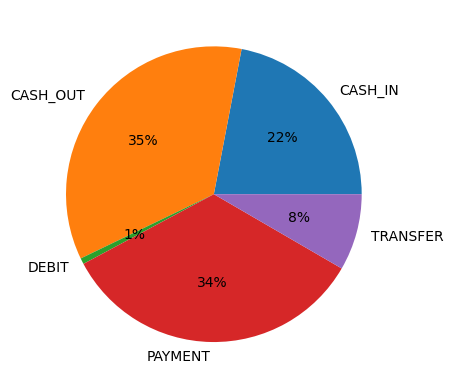

In [9]:
df_fraud.groupby('type').size().plot(kind='pie',autopct='%1.0f%%')

## Recipient/Custumer Analysis

In [10]:
recipients = df_fraud.groupby('nameDest')['amount'].count()
x = np.sum(recipients>1)/len(recipients)*100
print(f"recipients participated in more than 1 transaction %.0f%%" % x)
custumers = df_fraud.groupby('nameOrig')['amount'].count()
x = np.sum(custumers>1)/len(custumers)*100
print(f"custumers participated in more than 1 transaction %.2f%%" % x)

recipients participated in more than 1 transaction 17%
custumers participated in more than 1 transaction 0.15%


### Number of unique Customer (nameOrig) and Recipient (nameDest)

In [11]:
print('# unique nameOrig %d' % len(df_fraud["nameOrig"].unique()))
print('# unique nameDest %d' % len(df_fraud["nameDest"].unique()))


# unique nameOrig 6353307
# unique nameDest 2722362


### Destination type distribution
the columns starting with C meaning private custumers, and with M meaning Merchants

Text(0.5, 1.0, 'Custumers / Merchants ratio\nname destination')

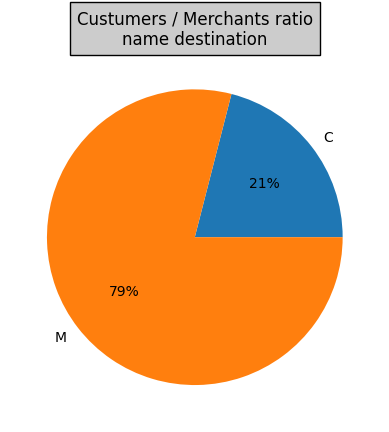

In [12]:
df_fraud['distType'] = df_fraud["nameDest"].str[0]

a = df_fraud.groupby('nameDest').count().reset_index()
a['distType'] = a["nameDest"].str[0]
axs = a.groupby('distType').size().plot(kind='pie',autopct='%1.0f%%')
plt.title(f"Custumers / Merchants ratio\n" + "name destination", bbox={'facecolor':'0.8', 'pad':5})

### Heat map between columns

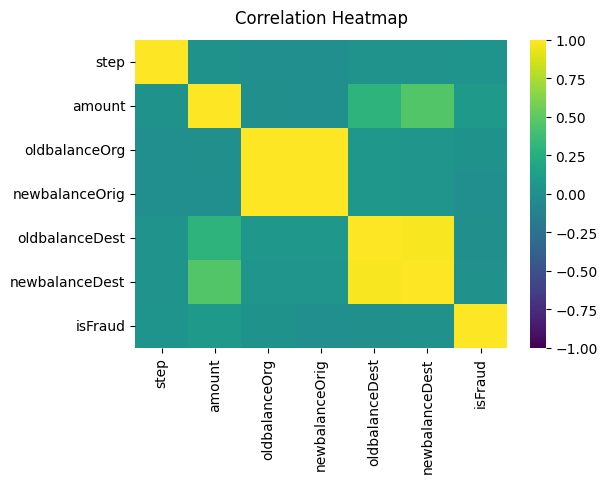

In [13]:
def heatmap_eda(data):
    """coppied from  https://www.kaggle.com/code/anastasiakorotkova/exploratory-data-analysis-ml-fraud-detection """
    data_h = data[['step', 'amount','oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud',
       ]]
    
    plt.figure(figsize=(6, 4))
    heatmap = sns.heatmap(data_h.corr(), vmin=-1, vmax=1, center=0, annot=False, cmap='viridis')
    heatmap.set_title('Correlation Heatmap', pad=12)
    
heatmap_eda(df_fraud)

from the heatmap it seems that there is a small dependency between fraud and the amount transferred, to be examined further with fraud transaction amount distribution. The dependencies between the origin balances and the destination balances are obvious

## Fraudulent Statistics


In [14]:
print('# Fraudulent transactions %.0f ' % df_fraud['isFraud'].sum())
print('# Legitimate transactions %d' % df_fraud[df_fraud['isFraud']==0]["isFraud"].count())
x = df_fraud['isFraud'].sum()/df_fraud['isFraud'].count()*100
print('Fraudulent ratio %.2f%%' % x)

# Fraudulent transactions 8213 
# Legitimate transactions 6354407
Fraudulent ratio 0.13%


### Transaction amount distributions

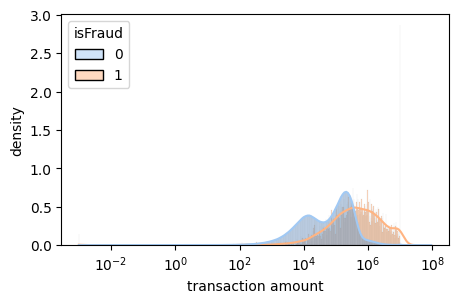

In [15]:
import warnings
warnings.filterwarnings('ignore')

def histplot_eda(data):
    plt.figure(figsize=(5, 3))
    palette = sns.color_palette("pastel")
    df=data.copy()
    df['amount'] +=0.001
    histplot = sns.histplot(data=df, 
                            x='amount', 
                            kde=True,
                            hue='isFraud',
                            stat="density",
                            common_norm=False,
                            palette=palette, log_scale=True)

    histplot.set_ylabel('density')
    histplot.set_xlabel('transaction amount')

histplot_eda(df_fraud)


In [16]:
df_fraud[df_fraud['isFraud']==False]['amount'].median()

74684.72

In [17]:
x = df_fraud[df_fraud['isFraud']==True]['amount']
print(f'average, median fraud transaction amount %d, %d' % (x.mean(),x.median()))
x = df_fraud[df_fraud['isFraud']==False]['amount']
print(f'average, median valid transaction amoun %d, %d' % (x.mean(),x.median()))


average, median fraud transaction amount 1467967, 441423
average, median valid transaction amoun 178197, 74684


### Fraud distribuition per transaction type

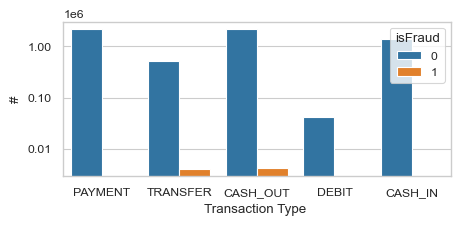

In [18]:
def countplot_eda(df):
    sns.set_style('whitegrid')
    sns.set_context('paper')
    plt.figure(figsize=(5, 2))
    axs = sns.countplot(data=df, x='type', hue='isFraud')
    axs.set_xlabel('Transaction Type ')
    axs.set_ylabel('#')
    axs.set_yscale('log')
    axs.yaxis.set_major_formatter(mticker.ScalarFormatter())
    plt.show()

countplot_eda(df_fraud)

In [19]:
print("amount of fraud in Merchants transactions %d" % df_fraud[df_fraud['distType']=='M']['isFraud'].sum())

amount of fraud in Merchants transactions 0


Therefore no fraud transaction occured in the trasnaction to merchants